In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
tr = pd.read_csv('data/train.csv', index_col='Id')
sub = pd.read_csv('data/sample-submission.csv')
#out = pd.read_csv('data/output.csv')

In [6]:
def standardise(tx):
    """
    Standardises over N samples each of the D features in the provided dataset
    
    tx: dataset (NxD)
    returns: standardised dataset
    """
    mean = np.mean(tx, axis=0)
    tx = tx - mean
    std = np.std(tx, axis=0)
    tx = tx / std
    return tx

In [7]:
tr['Prediction'].describe()
#On voit que dans les données il y a 250'000 éléments, 164333 sont du bruits, soit 65.7332% des données,
#85667 sont des signaux, soit 34.2778% des données

count     250000
unique         2
top            b
freq      164333
Name: Prediction, dtype: object

In [8]:
#out['Prediction'].mean()

In [9]:
tr[tr['DER_mass_MMC'] < 0]['Prediction'].describe() #=> la masse dérivée du boson est négative

count     38114
unique        2
top           b
freq      35279
Name: Prediction, dtype: object

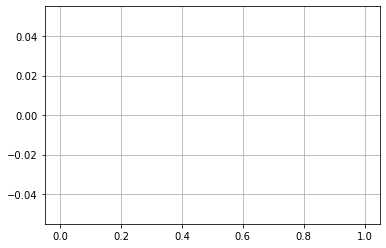

In [10]:
tr[tr['PRI_tau_eta']  >2.5]['Prediction'].hist() #Pas de bruit là dessus

In [11]:
massive = tr[tr['DER_mass_MMC'] > 0]

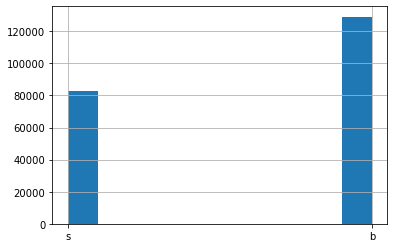

In [12]:
massive['Prediction'].hist()

different types of particles are electrons, muons, hadronic tau, jets
and missing transverse energy.
Electrons, muons, and taus are the three leptons,
electrons and muons live long enough to reach the detector. (energy and
direction can be measured directly)
Taus decay almost immediately into either an electron and two neutrinos,
a muon and two neutrinos or a bunch of charged particles and a neutrino
The bunch of hadrons can be identified as a pseudo particle called hadronic tau.
Jets are pseudo particles, they originate from a high energy quark or gluon.
They appear in the detector as a collimated energy deposit associated with charged tracks.
The measured Momenta of all particles of the event is the primary info provided.

3D direct reference frame. x,y,z. phi and theta = angles
Transverse quantities are quantities projected on the x-y plane.
use pseudorapidity n = -ln(tan(theta/2)). n = 0 implies that the particle
travels in the x-y plane and n = +inf or -inf => particle travels in z-axis.
Particles can be identified for n in -2.5,2.5. for n in 2.5,5 they can be measured
but they cannot be identified.
Particles with n beyond 5 escape detection.
transverse energy.
For each event, produce a list of momenta for zero or more particles for each type,
plus the missing transverse energy. (Challenge has only events with one
muon, or one electron (exclusively) and one hadronic tau)

These particles should be of opposite electric charge

Detailed description of the features:

Variables prefixed with PRI (Primitives) are raw quantities about the bunch
collision as measured by the detecteor, essentially the momenta of particles

Variables prefixed with DER (Derived) are quantities computed from the 
primitive features.

Azimuthal angles are in radian in the -pi pi range
energy, mass, and momentum are all in GeV

Variables are indicated as may be undefined when it can happen
that they are meaningless or cannot be computed, in this case, their value
is -999.0

DER_mass_MMC = estimated mass mh of the Higgs boson candidate.

DER_mass_transverse_met_lep = the transverse mass between the missing transverse
energy and the lepton

DER_mass_vis = the invariant mass of the hadronic tau and the lepton

DER_pt_h = The modulus of the vector sum of the transverse momentum of
hadronic tau, the lepton and the missing transverse energy vector?????

DER_deltaeta_jet_jet = the absolute value of the pseudorapidity separation between
two jets (undefined if PRI_jet_num <=1 )

DER_mass_jet_jet = The invariant mass of the two jets (undefined if PRI_jet_num <=1 )

DER_prodeta_jet_jet = the product of the pseudorapidities of the two jets
(undefined if PRI_jet_num <=1 )

DER_deltar_tau_lep = The R separation between the hadronic tau and lepton

DER_pt_tot = Modulus of the vector sum of the missing transverse momenta and 
the transverse momenta of the hadronic tau, the lepton, the leading jet
(if PRI_jet_num >=1 ) and the subleading jet (if PRI_jet_num =2 ) but not of any additional jets

DER_sum_pt = The sum of the moduli of the transverse momenta of the hadronic tau, the
lepton, the leading jet (if PRI jet num ≥ 1) and the subleading jet (if PRI jet num = 2)
and the other jets (if PRI jet num = 3).

DER pt ratio lep tau = The ratio of the transverse momenta of the lepton and the hadronic
tau

DER met phi centrality = The centrality of the azimuthal angle of the missing transverse energy vector w.r.t.
the hadronic tau and the lepton
C = (A+B)/sqrt(A**2 + B**2)
where A = sin(φmet − φlep), B = sin(φhad − φmet), and φmet, φlep, and φhad are the azimuthal angles of the
missing transverse energy vector, the lepton, and the hadronic tau,
respectively. The centrality is √2 if the missing transverse energy vector ~EmissT
is on the bisector of the transverse momenta of the lepton and the hadronic tau. It decreases to 1 if ~EmissT
is collinear with one of these vectors and it decreases further to −√2 when ~EmissT
is exactly opposite to the bisector.

DER lep eta centrality = The centrality of the pseudorapidity of the lepton w.r.t. the two jets
(undefined if PRI jet num ≤ 1) 
    sale équation avec des exp,
where ηlep is the pseudorapidity of the lepton and η1 and η2 are the pseudorapidities of the
two jets. The centrality is 1 when the lepton is on the bisector of the two jets, decreases to
1/e when it is collinear to one of the jets, and decreases further to zero at infinity.

PRI tau pt = The transverse momentum sqrt(px**2 + py**2) of the hadronic tau

PRI tau eta = The pseudorapidity η of the hadronic tau.

PRI tau phi = The azimuth angle φ of the hadronic tau.

PRI lep pt = The transverse momentum sqrt(px**2 + py**2) of the lepton (electron or muon).

PRI lep eta = The pseudorapidity η of the lepton

PRI lep phi = The azimuth angle φ of the lepton

PRI met = The missing transverse energy ~EmissT

PRI met phi = The azimuth angle φ of the missing transverse energy

PRI met sumet = The total transverse energy in the detector

PRI jet num The number of jets (integer with value of 0, 1, 2 or 3; possible larger values have
been capped at 3).

PRI jet leading pt = The transverse momentum sqrt(px**2 + py**2) of the leading jet, that is the jet with
largest transverse momentum (undefined if PRI jet num = 0).

PRI jet leading eta = The pseudorapidity η of the leading jet (undefined if PRI jet num =
0)

PRI jet leading phi =  The azimuth angle φ of the leading jet (undefined if PRI jet num = 0)

PRI jet subleading pt = The transverse momentum sqrt(px**2 + py**2) of the leading jet, that is, the
jet with second largest transverse momentum (undefined if PRI jet num ≤ 1).

PRI jet subleading eta = The pseudorapidity η of the subleading jet (undefined if PRI jet num ≤
1)

PRI jet subleading phi = The azimuth angle φ of the subleading jet (undefined if PRI jet num ≤
1).


PRI jet all pt = The scalar sum of the transverse momentum of all the jets of the events.

Weight = The event weight wi explained in Section 3.3. Not to be used as a feature. Not available
in the test sample.
'''

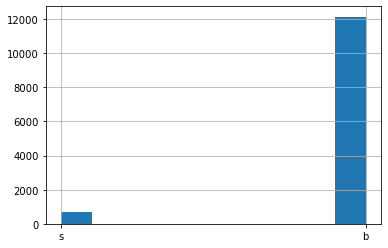

In [13]:
tr[(tr['DER_mass_MMC'] > 200)]['Prediction'].hist()

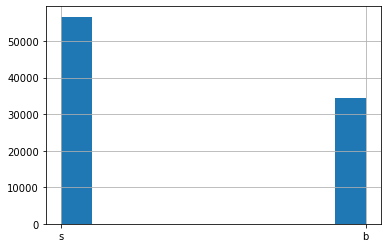

In [14]:
tr[(tr['DER_mass_MMC']> 110) & (tr['DER_mass_MMC']< 170)]['Prediction'].hist()

In [15]:
tr.columns

Index(['Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019FC9438788>,
      dtype=object)

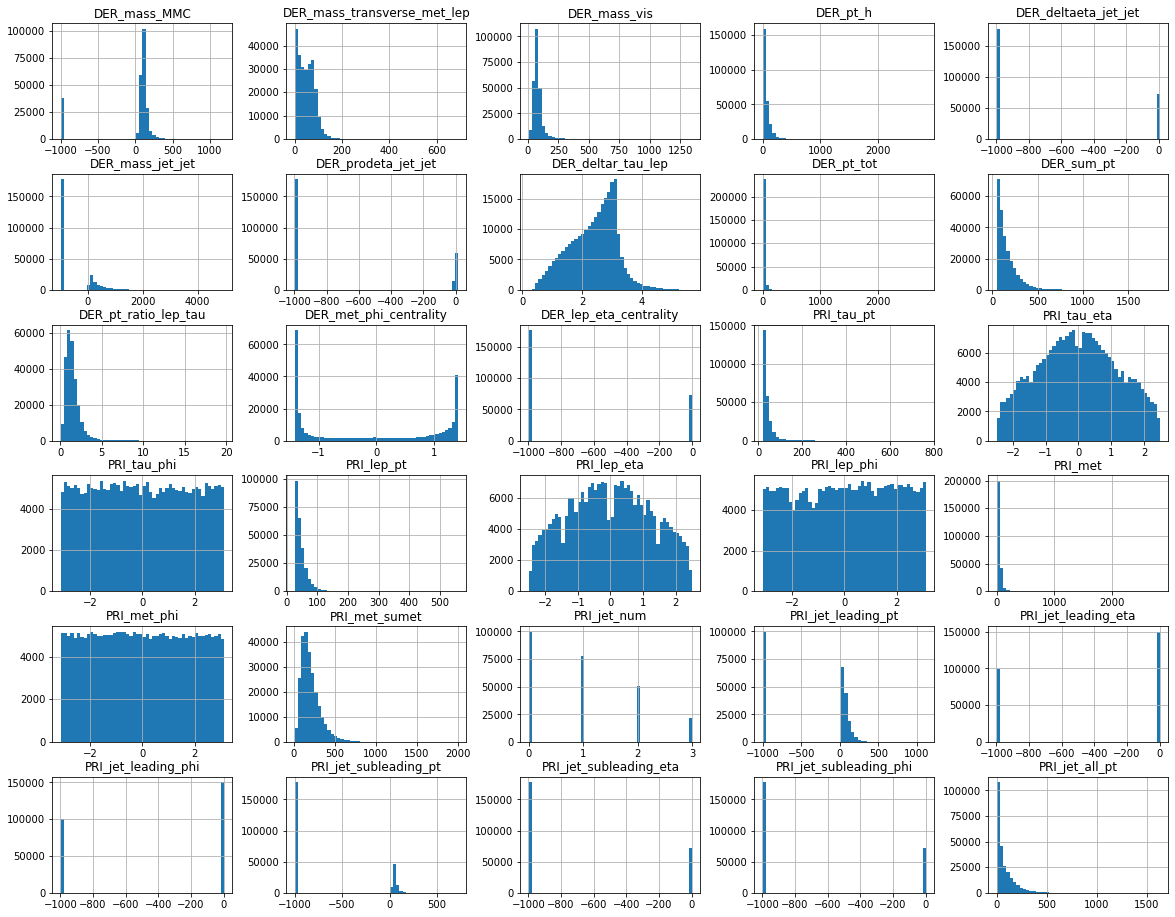

In [16]:
tr.hist(bins = 50, figsize =(20,16))

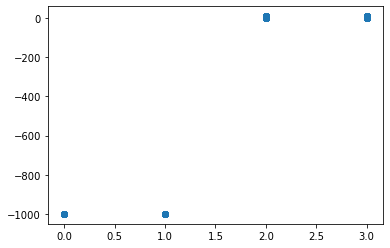

In [17]:
plt.scatter(tr['PRI_jet_num'], tr['DER_deltaeta_jet_jet'])

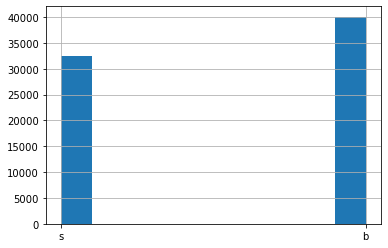

In [18]:
tr[(tr['PRI_jet_num'] >= 2)]['Prediction'].hist()

In [19]:
tr[tr['DER_mass_MMC'].gt(100)]

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Id,,,,,,,,,,,,,,,,,,,,,
100000,s,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
100001,b,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
100003,b,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
100004,b,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
100006,s,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,...,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349990,b,127.822,82.865,100.024,0.860,-999.000,-999.000,-999.000,3.210,0.860,...,2.674,120.320,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
349991,s,133.457,77.540,88.989,69.650,-999.000,-999.000,-999.000,2.484,2.490,...,-1.073,203.174,1,70.969,-1.234,2.521,-999.000,-999.000,-999.000,70.969
349993,s,130.075,3.918,66.781,77.369,0.936,322.296,-0.207,3.102,49.937,...,-1.768,694.010,3,155.864,-0.358,1.093,134.344,0.578,-2.215,546.066


In [20]:
tr_np = tr.drop('Prediction', axis = 1)
sum_999 = tr_np[tr_np == -999].fillna(0).sum(axis = 0)
idx = (sum_999 == 0)
tr_noCol999 = tr_np.drop(idx[idx==False].index, axis=1)

tr_noCol999.corr()

,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
DER_mass_transverse_met_lep,1.000000,0.190109,-0.249116,0.043251,0.017758,-0.146837,0.349504,-0.419757,-0.145464,-0.002109,0.001132,0.310648,-0.006777,0.000340,0.183716,-0.015925,-0.167811,-0.210537,-0.210009
DER_mass_vis,0.190109,1.000000,-0.062562,0.579712,-0.000702,0.088685,0.097490,-0.090846,0.290011,0.002127,-0.003624,0.405482,0.002196,-0.002018,-0.087330,-0.001467,0.053300,-0.026860,-0.052902
DER_pt_h,-0.249116,-0.062562,1.000000,-0.539379,0.310501,0.832733,0.089187,0.539356,0.407421,0.001665,0.005248,0.360939,0.008354,-0.002923,0.679585,0.008585,0.782547,0.623401,0.808616
DER_deltar_tau_lep,0.043251,0.579712,-0.539379,1.000000,-0.148081,-0.432603,0.047046,-0.205441,-0.202035,0.003632,-0.011229,-0.069957,0.000699,-0.000776,-0.402345,-0.001570,-0.407002,-0.347904,-0.448737
DER_pt_tot,0.017758,-0.000702,0.310501,-0.148081,1.000000,0.381160,0.039193,0.178448,0.095754,0.003596,0.001452,0.109617,0.007987,-0.004249,0.269739,0.002515,0.448925,0.360409,0.403382
DER_sum_pt,-0.146837,0.088685,0.832733,-0.432603,0.381160,1.000000,0.108791,0.420679,0.485847,0.002037,0.003931,0.460938,0.008781,-0.001892,0.520129,0.006712,0.904481,0.758503,0.965628
DER_pt_ratio_lep_tau,0.349504,0.097490,0.089187,0.047046,0.039193,0.108791,1.000000,-0.038803,-0.474633,0.000611,0.000004,0.701142,0.002357,-0.005053,0.053386,-0.001186,0.049904,0.056312,0.079116
DER_met_phi_centrality,-0.419757,-0.090846,0.539356,-0.205441,0.178448,0.420679,-0.038803,1.000000,0.140885,0.005953,-0.001557,0.054047,0.012423,0.000278,0.180756,0.009896,0.423363,0.490057,0.452224
PRI_tau_pt,-0.145464,0.290011,0.407421,-0.202035,0.095754,0.485847,-0.474633,0.140885,1.000000,-0.002661,0.000822,0.104553,0.000053,0.003052,0.176665,0.003296,0.448763,0.205604,0.321341
PRI_tau_eta,-0.002109,0.002127,0.001665,0.003632,0.003596,0.002037,0.000611,0.005953,-0.002661,1.000000,-0.001322,-0.003330,0.557086,0.001705,0.000576,0.000582,0.002841,0.007468,0.003763


In [21]:
corr_mat = tr.corr()

In [22]:
correlated = corr_mat[(corr_mat > 0.9) & (corr_mat < 1)]

In [23]:
def filter_low_corr(corr_mat):
    correlated = corr_mat[(np.abs(corr_mat) > 0.9) & (np.abs(corr_mat) < 1)]
    col_sum = correlated.fillna(0).sum(axis=0)
    null_cols = col_sum[col_sum == 0].index
    fin = correlated.drop(null_cols, axis=1)
    fin = fin.drop(null_cols, axis=0)
    return fin

filter_low_corr(corr_mat=corr_mat)

,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_sum_pt,DER_lep_eta_centrality,PRI_met_sumet,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
DER_deltaeta_jet_jet,NaN,0.946045,0.999981,NaN,0.999998,NaN,NaN,NaN,NaN,0.999346,0.999995,0.999996,NaN
DER_mass_jet_jet,0.946045,NaN,0.944443,NaN,0.945584,NaN,NaN,NaN,NaN,0.947652,0.945505,0.945507,NaN
DER_prodeta_jet_jet,0.999981,0.944443,NaN,NaN,0.999990,NaN,NaN,NaN,NaN,0.999347,0.999988,0.999989,NaN
DER_sum_pt,NaN,NaN,NaN,NaN,NaN,0.904481,NaN,NaN,NaN,NaN,NaN,NaN,0.965628
DER_lep_eta_centrality,0.999998,0.945584,0.999990,NaN,NaN,NaN,NaN,NaN,NaN,0.999355,0.999997,0.999998,NaN
PRI_met_sumet,NaN,NaN,NaN,0.904481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRI_jet_leading_pt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.996100,0.996100,NaN,NaN,NaN,NaN
PRI_jet_leading_eta,NaN,NaN,NaN,NaN,NaN,NaN,0.9961,NaN,0.999992,NaN,NaN,NaN,NaN
PRI_jet_leading_phi,NaN,NaN,NaN,NaN,NaN,NaN,0.9961,0.999992,NaN,NaN,NaN,NaN,NaN
PRI_jet_subleading_pt,0.999346,0.947652,0.999347,NaN,0.999355,NaN,NaN,NaN,NaN,NaN,0.999352,0.999352,NaN


In [24]:
tmp = tr[tr==-999].fillna(0).sum(axis=1)
tmp = tmp[tmp != 0]
drop999 = tr.drop(tmp.index)
drop999

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Id,,,,,,,,,,,,,,,,,,,,,
100000,s,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
100005,b,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,...,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
100006,s,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,...,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
100011,b,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,...,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640
100023,s,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,...,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349976,s,137.371,4.640,92.603,107.121,3.189,322.430,-2.384,2.149,2.755,...,1.408,228.186,2,85.132,1.991,-1.518,51.068,-1.197,-2.831,136.200
349980,s,119.934,20.078,88.751,35.227,0.660,111.491,1.836,2.800,18.532,...,1.116,237.326,2,69.219,-1.064,1.118,43.719,-1.725,-2.756,112.938
349985,s,126.151,29.023,95.258,152.684,1.000,163.066,-0.240,1.504,24.642,...,-2.575,402.114,2,158.904,0.401,0.034,34.196,-0.599,-2.525,193.099


In [25]:
filter_low_corr(drop999.corr())

,DER_sum_pt,PRI_met_sumet,PRI_jet_all_pt
DER_sum_pt,NaN,0.907907,0.956422
PRI_met_sumet,0.907907,NaN,NaN
PRI_jet_all_pt,0.956422,NaN,NaN


In [26]:
drop999.corr()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
DER_mass_MMC,1.000000,0.242855,0.890239,0.014545,-0.027467,-0.021716,0.018621,0.523166,0.018376,0.085172,...,-0.000816,0.058675,0.004064,-0.009354,0.006624,0.002376,-0.016114,0.004979,-0.001914,-0.010920
DER_mass_transverse_met_lep,0.242855,1.000000,0.291220,-0.181702,-0.133691,-0.139195,0.122317,0.192582,0.096681,-0.015902,...,-0.011125,-0.016602,0.049785,-0.115592,0.001149,0.002618,-0.038240,0.000260,0.004185,-0.069087
DER_mass_vis,0.890239,0.291220,1.000000,-0.114411,-0.039252,-0.057677,0.033975,0.553544,0.000996,0.055058,...,-0.003913,0.020867,-0.008073,-0.094275,0.007200,0.000518,-0.055353,0.004726,-0.002778,-0.080567
DER_pt_h,0.014545,-0.181702,-0.114411,1.000000,-0.040681,0.188587,-0.022187,-0.671189,0.157942,0.722994,...,0.005837,0.650774,0.137704,0.749834,0.004453,0.002636,0.357044,-0.000003,-0.006936,0.638245
DER_deltaeta_jet_jet,-0.027467,-0.133691,-0.039252,-0.040681,1.000000,0.797545,-0.839442,0.038040,-0.178954,-0.113623,...,-0.003251,-0.145964,-0.179626,-0.051430,-0.001397,-0.001587,-0.097344,-0.003933,0.000938,-0.117166
DER_mass_jet_jet,-0.021716,-0.139195,-0.057677,0.188587,0.797545,1.000000,-0.765984,-0.119590,-0.069806,0.223191,...,0.001363,0.163655,-0.077329,0.276659,0.000136,0.000656,0.229003,-0.003449,-0.001724,0.233044
DER_prodeta_jet_jet,0.018621,0.122317,0.033975,-0.022187,-0.839442,-0.765984,1.000000,0.007353,0.133265,0.023092,...,0.002426,0.053059,0.127991,-0.018805,-0.004080,-0.002971,0.009205,-0.003218,0.002501,0.026202
DER_deltar_tau_lep,0.523166,0.192582,0.553544,-0.671189,0.038040,-0.119590,0.007353,1.000000,-0.115125,-0.454070,...,-0.000369,-0.424337,-0.113011,-0.484731,0.000998,0.002357,-0.243634,0.003177,0.006494,-0.422459
DER_pt_tot,0.018376,0.096681,0.000996,0.157942,-0.178954,-0.069806,0.133265,-0.115125,1.000000,0.415403,...,-0.000941,0.458993,0.602181,0.194338,-0.009120,0.004560,0.330964,-0.000433,-0.005376,0.459996
DER_sum_pt,0.085172,-0.015902,0.055058,0.722994,-0.113623,0.223191,0.023092,-0.454070,0.415403,1.000000,...,0.003120,0.907907,0.399455,0.880486,0.003205,0.003575,0.729512,-0.001457,-0.007262,0.956422


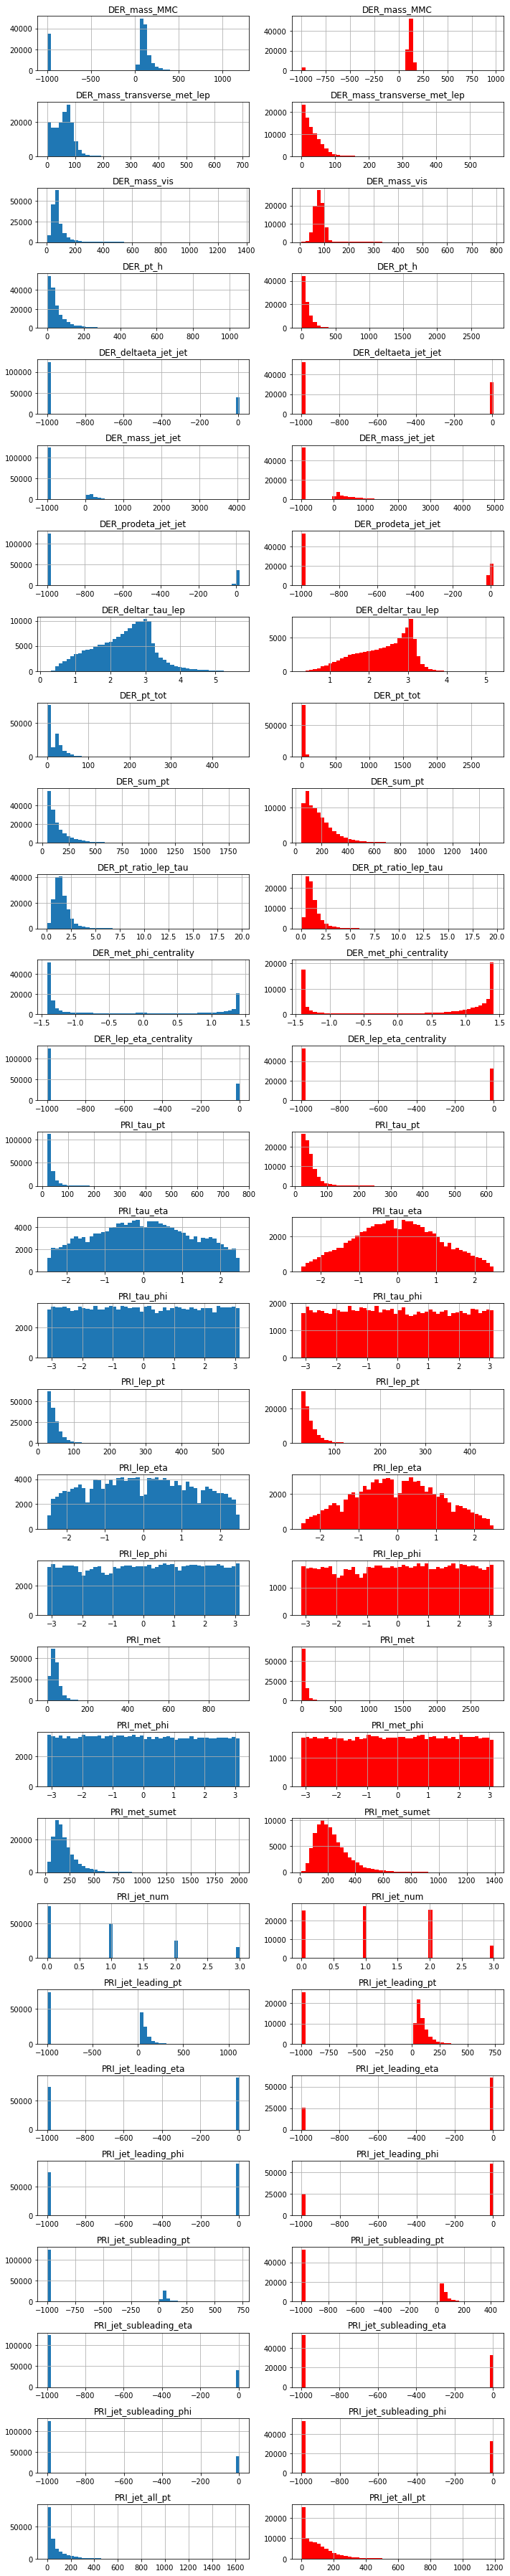

In [27]:
tr_b = tr[tr['Prediction'] == 'b'].drop('Prediction', axis=1)
tr_s = tr[tr['Prediction'] == 's'].drop('Prediction', axis=1)

fig, axes = plt.subplots(30,2, figsize = (10, 50))
for i, col in enumerate(tr_b.columns):
    tr_b[col].hist(bins = 50, ax=axes[i][0])
    axes[i][0].set_title(col)
    tr_s[col].hist(bins = 50, ax=axes[i][1], color = 'red')
    axes[i][1].set_title(col)
    
plt.tight_layout()

In [28]:
cols = []
for i, col in enumerate(tr_np.columns):
    if 'jet_jet' in col:
        cols.append(i)
        
cols

[4, 5, 6]

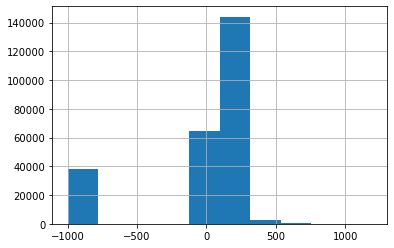

In [29]:
tr['DER_mass_MMC'].hist()

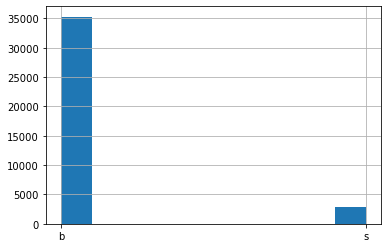

In [30]:
tr['Prediction'].loc[tr['DER_mass_MMC'] == -999].hist()

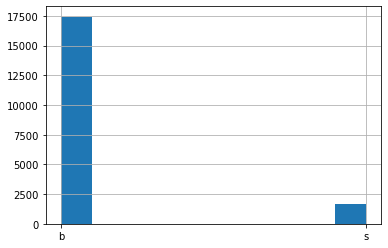

In [31]:
tr['Prediction'].loc[(tr['DER_mass_MMC'] < 80) & (tr['DER_mass_MMC'] > 60)].hist()

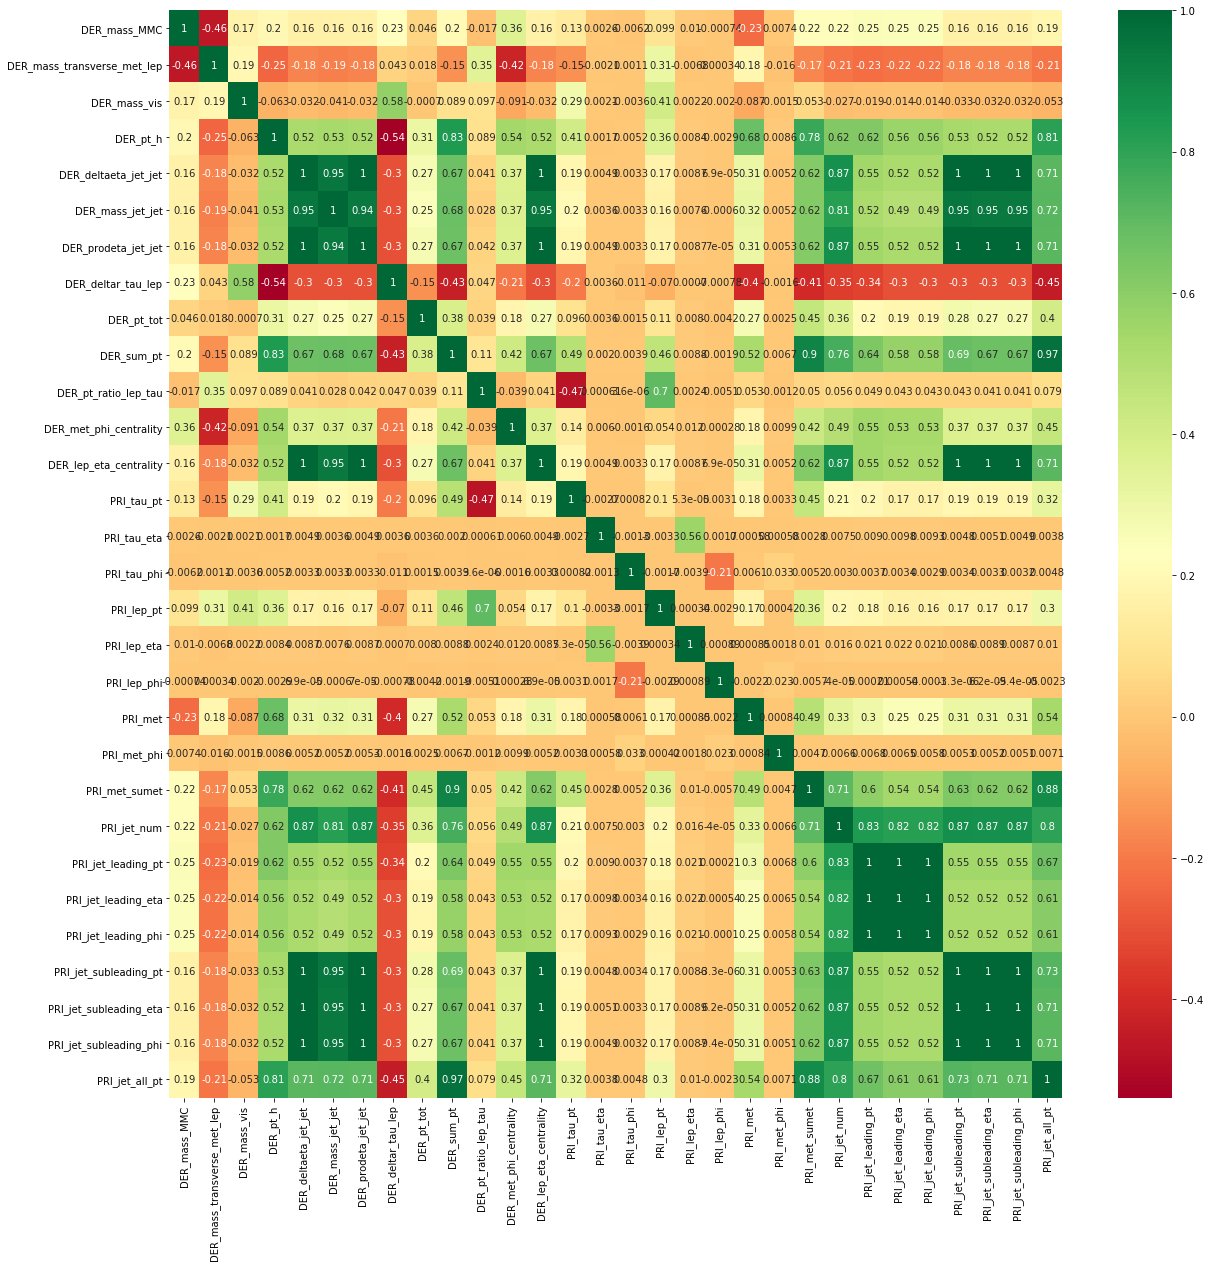

In [32]:
corrmat = tr.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(tr[top_corr_features].corr(),annot=True,cmap="RdYlGn")


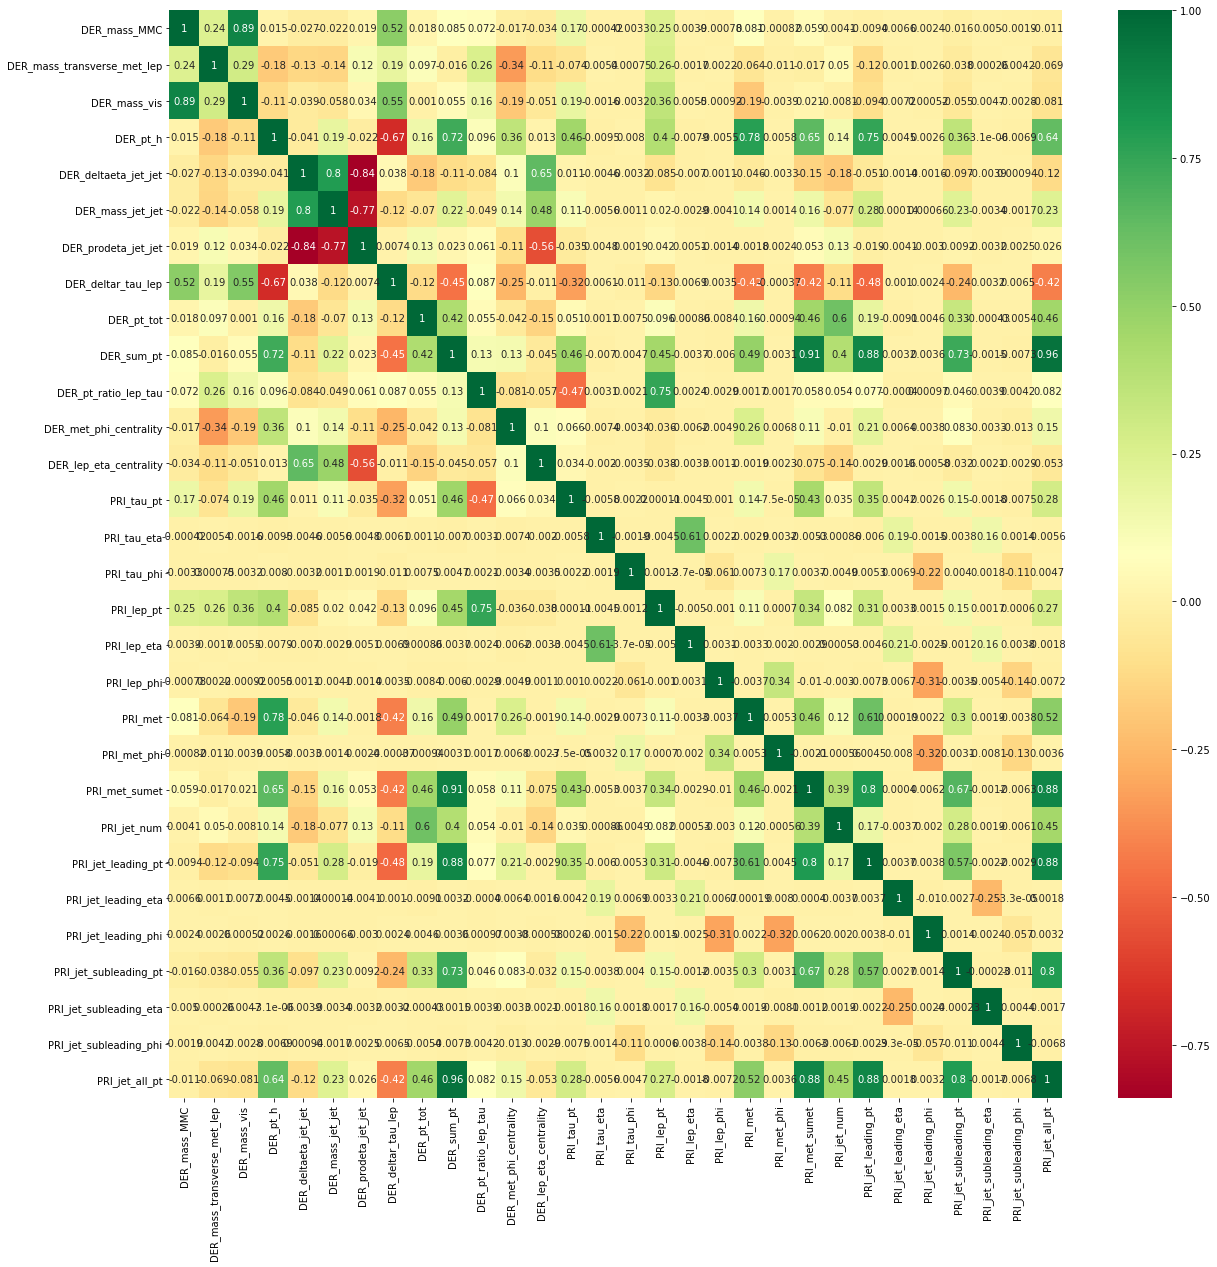

In [33]:
corrmat = drop999.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(drop999[top_corr_features].corr(),annot=True,cmap="RdYlGn")

DER_mass_MMC => 0.89 with DER_mass_vis

DER_delta_jet_jet => 0.8 DER_mass_jet_jet, -0.84 avec DER_prodeta_jet_jet

DER_mass_jet_jet => 0.8 DER_delta_jet_jet, -0.84 avec DER_prodeta_jet_jet

DER_prodeta_jet_jet => 0.8 DER_mass_jet_jet, 

DER_lep_eta_centrality => 0.65 avec der_delta_jet_jet

PRI_jet_leading_pt => 0.88 DER_sum_pt, 0.8 PRI_met_summet, 0.75 DER_pt

PRI_jet_leading_eta
PRI_jet_leading_phi
PRI_jet_subleading_pt
PRI_jet_subleading_eta
PRI_jet_leading_phi